In [55]:
# Importining neccesary packages
import numpy as np
import pandas as pd
import random
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle
from sklearn.cluster import KMeans
from collections import deque
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, accuracy_score


In [56]:
#
df = pd.read_csv('creditcard.csv')
df.head()
df.isnull().sum()
#print(df)
#df["Class"].value_counts()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [58]:
# Splitting features and target variable
X = df.drop(columns=["Class"])  # Features
y = df["Class"]  # Target
#print("y = ")
#print(y)
#print(" = y")
# Applying SMOTE to balance the classes
smote = SMOTE(sampling_strategy={1: 10000}, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
# df_resampled = smote.fit_resample(df)
# Checking new class distribution
#print(y_resampled.value_counts())

# The random_state parameter ensures the split is reproducible.
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=42)
#print(X_train.head())
#print(y_train.head())

# Comparing to other Models

We added a decision tree and a random forest to then compare the two models with our own model we created
You can see the following results

## Decision Tree

Note:
Precision: How many predicted Frauds were actually fraud? TP / (TP + FP)

Recall (Sensitivity): How many actual Frauds did we catch? TP / (TP + FN)

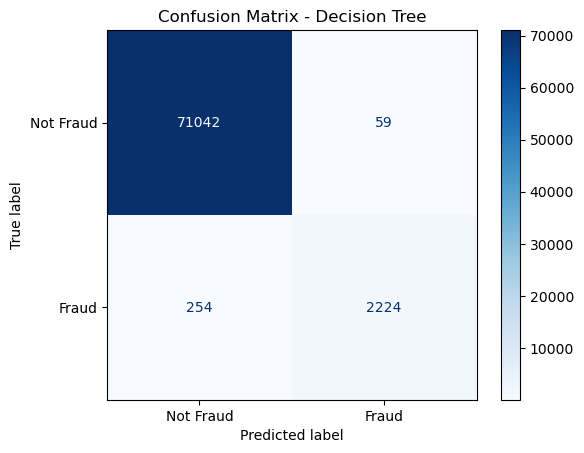

Decision Tree Test Accuracy: 0.9957
R2 score for: 0.9979
Classification Report for Decision Tree:

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     71101
       Fraud       0.97      0.90      0.93      2478

    accuracy                           1.00     73579
   macro avg       0.99      0.95      0.97     73579
weighted avg       1.00      1.00      1.00     73579

Accuracy: 0.9957
Fraud-specific Performance Metrics:

True Positives (TP): 2224
False Negatives (FN): 254  <-- ❗Missed frauds
Recall (for fraud): 0.8975
False Negative Rate: 0.1025


In [53]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

# Train a Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)  # max_depth to control size of tree
dt_model.fit(X_resampled, y_resampled)#X_train, y_train) #X_resampled, y_resampled




# Predict on the test set
y_pred = dt_model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Not Fraud", "Fraud"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# Evaluate accuracy
accuracy = dt_model.score(X_test, y_test)
print(f"Decision Tree Test Accuracy: {accuracy:.4f}")
r2 = rf_model.score(X_test, y_test)
print(f'R2 score for: {r2:.4f}')
# Predict on test set (already done earlier)
y_pred = dt_model.predict(X_test)

# Print detailed classification report
print("Classification Report for Decision Tree:\n")
print(classification_report(y_test, y_pred, target_names=["Not Fraud", "Fraud"]))

# Optionally, print just the accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# Predict on test set
y_pred = dt_model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

print("Fraud-specific Performance Metrics:\n")
print(f"True Positives (TP): {tp}")
print(f"False Negatives (FN): {fn}  <-- ❗Missed frauds")
print(f"Recall (for fraud): {tp / (tp + fn):.4f}")
print(f"False Negative Rate: {fn / (tp + fn):.4f}")

Precision: How many predicted Frauds were actually fraud? TP / (TP + FP)

Recall (Sensitivity): How many actual Frauds did we catch? TP / (TP + FN)

## Random Forrest

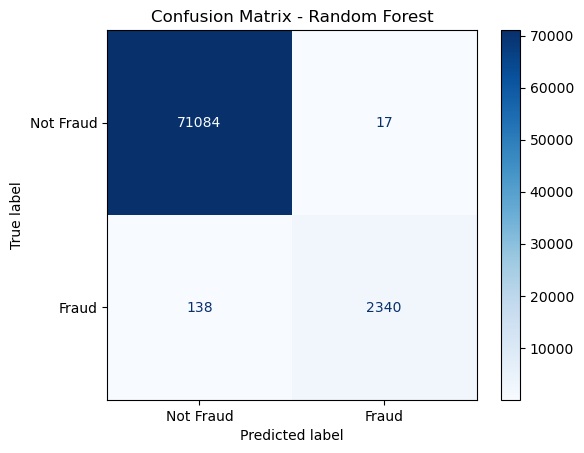

Classification Report for Random Forrest:

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     71101
       Fraud       0.99      0.94      0.97      2478

    accuracy                           1.00     73579
   macro avg       1.00      0.97      0.98     73579
weighted avg       1.00      1.00      1.00     73579

R2 score for: 0.9979
Accuracy: 0.9979
Fraud-specific Performance Metrics:

True Positives (TP): 2340
False Negatives (FN): 138  <-- ❗Missed frauds
Recall (for fraud): 0.9443
False Negative Rate: 0.0557


In [54]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model.fit(X_train, y_train)


# Predict on the test set
y_pred = rf_model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Display the matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Not Fraud", "Fraud"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest")
plt.show()

from sklearn.metrics import classification_report, accuracy_score

# Predict on test set (already done earlier)
y_pred = rf_model.predict(X_test)

# Print detailed classification report
print("Classification Report for Random Forrest:\n")
print(classification_report(y_test, y_pred, target_names=["Not Fraud", "Fraud"]))


r2 = rf_model.score(X_test, y_test)
print(f'R2 score for: {r2:.4f}')

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# Predict on test set
y_pred = rf_model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

print("Fraud-specific Performance Metrics:\n")
print(f"True Positives (TP): {tp}")
print(f"False Negatives (FN): {fn}  <-- ❗Missed frauds")
print(f"Recall (for fraud): {tp / (tp + fn):.4f}")
print(f"False Negative Rate: {fn / (tp + fn):.4f}")